### 数据集：
- [HASYv2](https://zenodo.org/record/259444#.XADL6rEzaHs)数据集包含__168233__张数学符号图像，分__369__种
- $32 * 32$像素大小
- 类似下图：
![](HASYv2.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as pil_image
from keras.preprocessing.image import img_to_array
from IPython.display import Image
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D

D:\AI\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


- 字母$A$

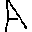

In [2]:
Image("HASYv2/hasy-data/v2-00000.png")

- 字母$\pi$

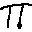

In [3]:
Image("HASYv2/hasy-data/v2-00568.png")

- 字母$\Omega$

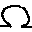

In [4]:
Image("HASYv2/hasy-data/v2-163686.png")

### 加载数据
- 数据已经加上lable并且保存在csv文件中，所以从csv读取文件

In [5]:
hasy = pd.read_csv("HASYv2/hasy-data-labels.csv")
hasy.head()

,path,symbol_id,latex,user_id
0,hasy-data/v2-00000.png,31,A,50
1,hasy-data/v2-00001.png,31,A,10
2,hasy-data/v2-00002.png,31,A,43
3,hasy-data/v2-00003.png,31,A,43
4,hasy-data/v2-00004.png,31,A,4435


In [6]:
images = []
classes = []
for path, latex in zip(hasy['path'], hasy['latex']):
    img = img_to_array(pil_image.open("HASYv2/" + path))
    img /= 255.0
    images.append(img)
    classes.append(latex)

In [7]:
len(images)

168233

In [8]:
X = np.array(images)
y = np.array(classes)

### One-Hot编码

In [9]:
label_encoder = LabelEncoder()
label_encoder_y = label_encoder.fit_transform(y)

onehot_encoder = OneHotEncoder(sparse=False)
label_encoder_y = label_encoder_y.reshape(-1, 1)
y = onehot_encoder.fit_transform(label_encoder_y)

In [10]:
num_classes = len(label_encoder.classes_)
num_classes

369

### 分割数据

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

### 创建模型

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=np.shape(X_train[0])))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

### 编译模型

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 训练模型

In [14]:
callback = keras.callbacks.TensorBoard(log_dir='logs/mnist-style')
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=2, validation_split=0.2, callbacks=[callback])

Train on 107668 samples, validate on 26918 samples
Epoch 1/100
 - 37s - loss: 2.0905 - acc: 0.5360 - val_loss: 1.0979 - val_acc: 0.7087
Epoch 2/100
 - 37s - loss: 1.2001 - acc: 0.6830 - val_loss: 0.9015 - val_acc: 0.7495
Epoch 3/100
 - 35s - loss: 1.0495 - acc: 0.7102 - val_loss: 0.8461 - val_acc: 0.7583
Epoch 4/100
 - 35s - loss: 0.9725 - acc: 0.7276 - val_loss: 0.7968 - val_acc: 0.7728
Epoch 5/100
 - 35s - loss: 0.9192 - acc: 0.7384 - val_loss: 0.7796 - val_acc: 0.7739
Epoch 6/100
 - 36s - loss: 0.8879 - acc: 0.7453 - val_loss: 0.7539 - val_acc: 0.7798
Epoch 7/100
 - 35s - loss: 0.8544 - acc: 0.7520 - val_loss: 0.7513 - val_acc: 0.7806
Epoch 8/100
 - 36s - loss: 0.8273 - acc: 0.7587 - val_loss: 0.7451 - val_acc: 0.7818
Epoch 9/100
 - 35s - loss: 0.8073 - acc: 0.7622 - val_loss: 0.7407 - val_acc: 0.7796
Epoch 10/100
 - 369s - loss: 0.7882 - acc: 0.7665 - val_loss: 0.7365 - val_acc: 0.7852
Epoch 11/100
 - 16s - loss: 0.7744 - acc: 0.7680 - val_loss: 0.7396 - val_acc: 0.7828
Epoch 12/10

Epoch 96/100
 - 15s - loss: 0.5474 - acc: 0.8190 - val_loss: 0.8126 - val_acc: 0.7826
Epoch 97/100
 - 15s - loss: 0.5470 - acc: 0.8204 - val_loss: 0.8121 - val_acc: 0.7810
Epoch 98/100
 - 15s - loss: 0.5506 - acc: 0.8193 - val_loss: 0.8185 - val_acc: 0.7823
Epoch 99/100
 - 15s - loss: 0.5472 - acc: 0.8199 - val_loss: 0.8191 - val_acc: 0.7785
Epoch 100/100
 - 15s - loss: 0.5501 - acc: 0.8193 - val_loss: 0.8223 - val_acc: 0.7816


### 评估模型

In [15]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33647/33647 [==============================] - 2s 67us/step
Test loss: 0.8125586455639331
Test accuracy: 0.7828335364311239


### 保存模型

In [16]:
model.save("mathsymbols.model")

### 保存label encoder

In [17]:
np.save('classes.npy', label_encoder.classes_)

### 使用模型做预测

- 加载训练好的模型

In [18]:
loaded_model = keras.models.load_model("mathsymbols.model")
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

- 加载label encoder

In [19]:
label_encoder2 = LabelEncoder()
label_encoder2.classes_ = np.load('classes.npy')

In [20]:
def predict(img_path):
    pred_img = img_to_array(pil_image.open(img_path))
    pred_img /= 255.0
    
    pred = loaded_model.predict(pred_img.reshape(1, 32, 32, 3))
    
    inverted = label_encoder2.inverse_transform([np.argmax(pred)])
    print("Prediction: %s, confidence: %.2f" % (inverted[0], np.max(pred)))

In [21]:
predict("HASYv2/hasy-data/v2-00010.png")

Prediction: A, confidence: 0.98


D:\AI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
predict("HASYv2/hasy-data/v2-00500.png")

Prediction: \pi, confidence: 0.97


D:\AI\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
